#### Initial setup

In [9]:
using Plots
using LaTeXStrings
using Printf

# Heat equation

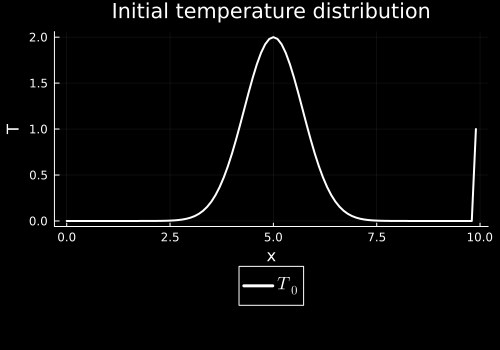

In [10]:
lambda = 0.5

# spatial discretization
L = 10.0
ds = 0.1

s = collect(0:ds:L-ds)
n = length(s) - 2

# time discretization
t0 = 0.0
te = 10.0
dt = 0.005

t = collect(t0:dt:te-dt)
N = length(t)

# boundary conditions
T_left = 0.0
T_right = 1.0

# initial condition (including BC)
T0 = zeros(length(s))
T0[1] = T_left
T0[2:end-1] = 2.0 * exp.(-((s[2:end-1] .- L/2.0).^2))
T0[end] = T_right

# Plotting the results
p1 = plot(xlabel="x", ylabel="T", size=(500,350),
     title="Initial temperature distribution",grid=true,
     background_color="#000000")
plot!(p1, s, T0, linecolor=:white, linestyle=:solid,
     linewidth=2, label=L"T_0")
plot!(p1, legend=:outerbottom, legendfontcolor=:white,
    legendfontsize=12)


In [11]:
# initialize solution
# spatial dimension x time steps
T = zeros(n + 2, N)

# insert initial condition
T[:, 1] .= T0

# set BCs for all time steps
T[1, :] .= T_left
T[end, :] .= T_right

# determine the A matrix for the
# finite-difference scheme
A = zeros(n,n+2)
for i in 1:(n)
    A[i, i] = 1.0
    A[i, i+1] = -2.0
    A[i, i+2] = 1.0
end

# scale A by grid size
A *= lambda/ds^2

# Time stepping using the Explicit Euler
for i in 1:(N - 1)
    T[2:end-1, i+1] = T[2:end-1, i] + dt * A * T[:, i]
end


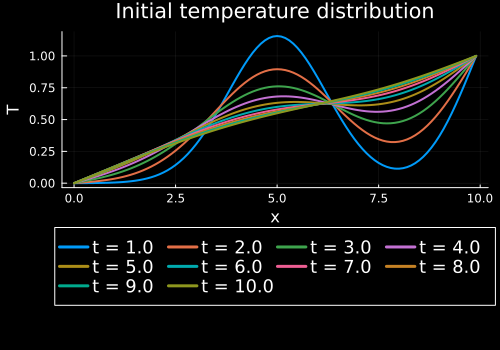

In [12]:
# plotting the results
p1 = plot(xlabel="x", ylabel="T", size=(500,350),
     title="Initial temperature distribution",grid=true,
     background_color="#000000")
for i in 1:round(Int, N/200)
    plot!(p1, s, T[:, 200*i], linestyle=:solid,
        linewidth=2, label = @sprintf("t = %.1f",t[200*i]))
        #label=L{"t = " + String(t[i])})
end
plot!(p1, legend=:outerbottom, legendcolumns=4, legendfontcolor=:white,
    legendfontsize=12)


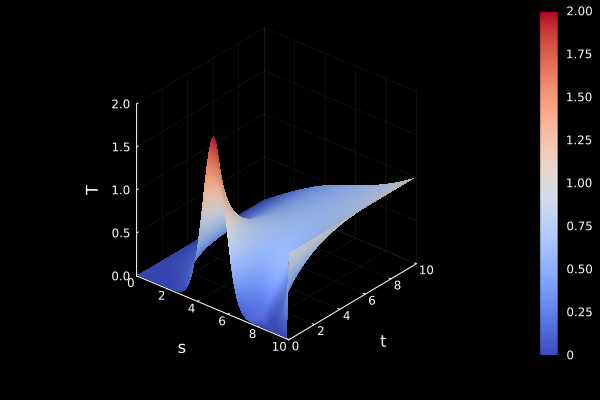

In [13]:
ss, tt =  range(0,10, length=100), range(0,10, length=2000)

surface(ss, tt, T', cmap=:coolwarm, camera=(40,30),
    grid=true, background_color="#000000")

xlabel!("s")
ylabel!("t")
zlabel!("T")


┌ Info: Saved animation to c:\Users\sebas\sciebo\Lehre\Vorlesungen\DS4DS\heatequation.gif
└ @ Plots C:\Users\sebas\.julia\packages\Plots\io9zQ\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\sebas\\sciebo\\Lehre\\Vorlesungen\\DS4DS\\heatequation.gif")
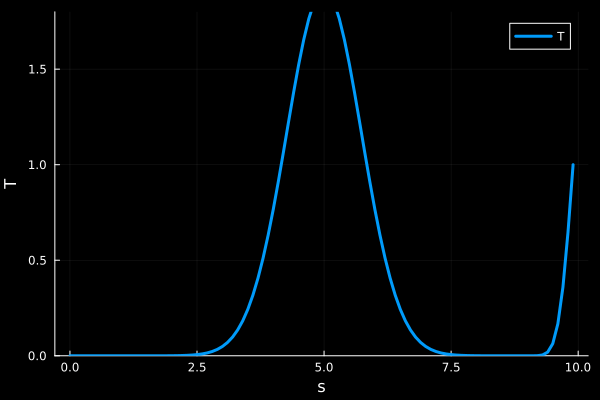

In [17]:
anim = @animate for i in 1:round(Int, N/10)
    plot(s, T[:, 10*i],background_color="#000000", 
        label = "T",linewidth=3, ylimits=(0,1.8))
    xlabel!("s")
    ylabel!("T")
end
gif(anim, "heatequation.gif", fps = 15)